# Find the Eurostat_Logo.png you want using an API

👋 Welcome!

Today’s topic is the Eurostat API. We'll proceed on the assumption that all of us are already familiar with the Eurostat database.

## 🧮 Getting data from Eurostat beyond Excel and CSV

When we need data from **Eurostat** — the statistical office of the European Union — many of us go directly to their online database. There, we typically search for the dataset we need and download it as a CSV or Excel file. This is a simple and effective method, especially for occasional use or when working with small datasets.

However, there is another way to access Eurostat data — one that can be faster, more flexible, and more powerful, especially if we want to:

* **reuse the same dataset** frequently without repeating the download process;
* **get the latest data** automatically every time we run our analysis;
* **filter and customize** the data before downloading it;
* **integrate data** into dashboards, reports, or data analysis workflows.

This alternative method uses something called an **API** (Application Programming Interface) and is used not only by Eurostat, but also by many other official statistical organizations.

| Feature                        | Manual Download (CSV/Excel)         | API Access (via tools like Python)           |
|-------------------------------|-------------------------------------|----------------------------------------------|
| **Ease of use**               | Very easy — just click and download | Requires a bit of setup (code), but reusable |
| **Updates**                   | Must re-download for new data       | Automatically gets the latest version        |
| **Customization**             | Limited (filters on website)        | High — you can filter exactly what you need  |
| **Reusability**               | Low — manual steps each time        | High — same code can be run again anytime    |
| **Integration with analysis** | Needs to be imported manually       | Seamless — directly used in data workflows   |
| **Best for**                  | Occasional or simple use            | Frequent, automated, or complex analyses     |


## 🔌 What is an API

An API is a way for different programs to communicate and exchange information — for example, between our Python script and Eurostat’s database.

An API works like a waiter at a restaurant:

You tell the waiter what you want (your **request/query**), the waiter brings the order to the kitchen (the server or database), and then brings the food back to you (the **response**).  
Similarly, when you search for something on a website — like a dataset — your request goes through an API, which asks the database and sends the results back to you in real time.

The way we make our request is through a **URL**.

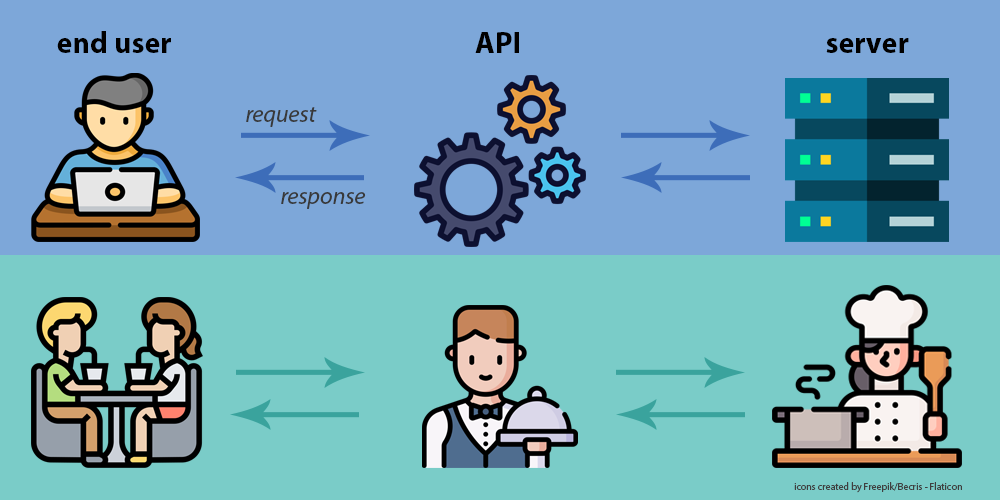

### 👉 It's you turn

This URL is an API request:  
https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/tps00001?format=JSON&time=2024&geo=EU27_2020&indic_de=JAN&lang=en  

Il gives the website a list of instructions about what kind of data we want.  
Can you identify the specific elements related to the instructions?

In [ ]:
#@title 🆘solution {display-mode: "form"}

"""
After the question mark, we see a pattern that looks like:
key=value
Each of these pairs is called a parameter, and they are joined together using an ampersand (&).

What does that mean?
The key (the part before the = sign) identifies what the parameter is referring to — like a question or setting (for example: "What year?" → time).
The value (the part after the = sign) provides the answer or specific detail for that key. (for example: "2024").

Example:
time=2024 → we are saying "I want data of the year 2024"
geo=EU27_2020 → "I want data about the European Union, 27 countries as of 2020"
format=JSON → "I want the results in JSON format"
lang=en → "I want the results in English"
"""

👉 Now open the previous URL in your browser: what you’ve just done is send your API query — in the address bar, and what you see in return is the API response — that is, the data you requested.

Let’s try to answer these questions:
1. What is the main subject of the data?  

2. Which year is this data referring to?

3. What is the geographical area covered by this observation?  

4. How many values are returned?  

5. Is there any indication about the quality or status of the data?  

6. What kind of frequency is used for this data?

7. Can you find any descriptive text or notes about the data?  

8. When was this dataset last updated?  

9. Where could you find more information or documentation about this dataset?  

10. If you wanted to request data for a different year, such as 2021, where would you need to make a change?

So far, we've learned that requesting data via an API means building a URL that follows specific rules, and that the system returns the data in a structured format, also based on rules.

Now it's time to explore these rules more closely, so we can learn how to build our own queries and understand the results.  

Since the rules depend on how the data is organized, we first need to understand the data structure.

## 🔦 How Eurostat data works

Eurostat, as many other official statistical sources, uses a **multidimensional data model**, where data is arranged in a structure called a **cube**, where each **dimension** represents a different aspect of the data and the each intersection of these dimensions holds a **measure**.

Key components of this model include **dimensions**, **attributes**, **measures**, **codelists**, and **dataflows**.  
Recognizing these elements is essential, as they are the building blocks used to construct an API query.

eurostat_data_cube.svg

### 1. Dimensions

**Definition:**  
Dimensions are the perspectives or categories by which data can be analyzed.

**Examples:**
- Time
- Geography
- Product

**Purpose:**  
Used to slice, dice, and filter data.

---

### 2. Attributes

**Definition:**  
Attributes are descriptive properties of a dimension. They give context and structure.

**Examples:**
- In the *Time* dimension: Year, Quarter, Month
- In the *Geography* dimension: Country, Region, City
- In the *Product* dimension: Group

**Purpose:**  
Provide levels of granularity and hierarchies within dimensions.

---

### 3. Measures

**Definition:**  
Measures are the numeric values that are analyzed across dimensions.

**Examples:**
- Sales
- Revenue
- Temperature
- Population

**Purpose:**  
To be aggregated (e.g., sum, average) and analyzed with respect to dimensions.

---

### 4. Codelist

**Definition:**  
A codelist is a predefined list of valid codes and their associated human-readable meanings.

**Examples:**
- Country codes: `IT` = Italy, `FR` = France
- Month codes: `01` = January, `02` = February

**Purpose:**  
It ensures consistency and standardization across datasets. It links codes with labels for interpretation.

---

### 5. Dataflow

**Definition:**  
A dataflow defines a structured dataset organized by dimensions and measures. It links the **structure** (dimensions, attributes, measures) to the **actual data**.

**Examples:**
- A dataset of monthly GDP by country.
- A dataset of daily temperatures by city.

**Purpose:**  
It represents the complete logical dataset and acts as a container that ties together the metadata (structure) and the actual data values.

---

## 📰 Current real-world use case

One example that highlights the importance of keeping data updated over time is the impact of new **tariffs** introduced by U.S. President Donald Trump on foreign countries. These policy changes — along with the statements and decisions that followed — had effects on trade balances of many countries.

In this case, using an API is especially helpful: it allows us to monitor changes over time, always accessing the most up-to-date data without downloading files manually each time.

### 👉 It's you turn

Our aim now is to identify the key components of a dataset. Exploring the Eurostat tables and the available options on their website can give us **valuable hints** on how to retrieve the same information using an API. It helps us understand which indicators, filters, and dimensions we need to include in our API query.

The table below shows the **“International trade of EU and non-EU countries since 2002 by Standard International Trade Classification (SITC)”**.

Can you identify the **key components** of this dataset? Some are clearly visible, while others require closer inspection.

https://ec.europa.eu/eurostat/databrowser/view/ds-059331/legacyMultiFreq/table?lang=en

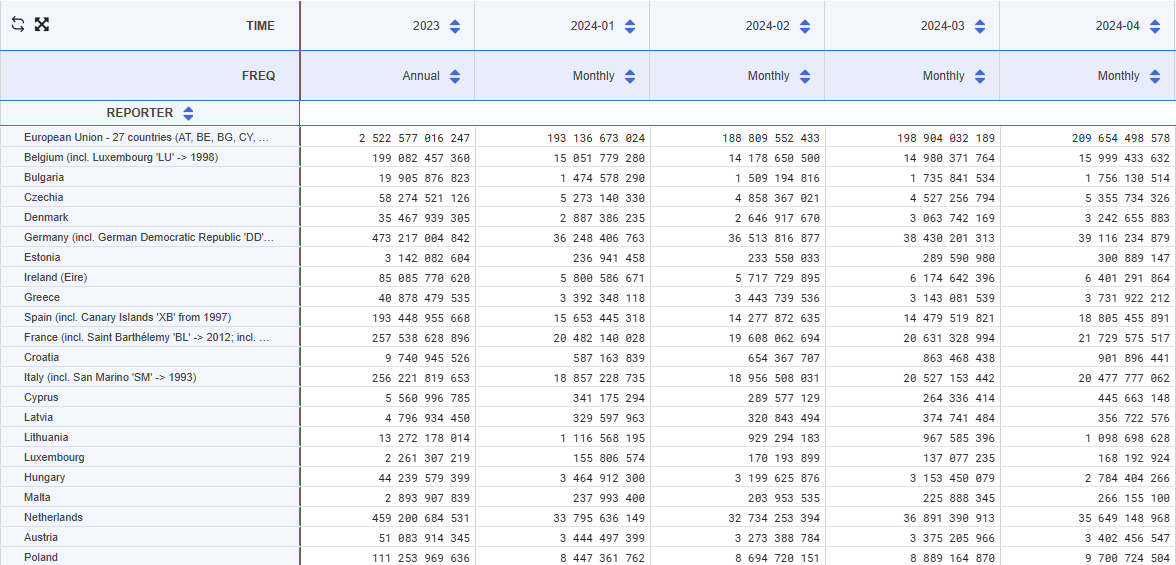

In [ ]:
#@title 🆘solution {display-mode: "form"}
"""
You can find the key components by clicking the “Customize your dataset” button at the top right of the page.
"""

## 🧩 The structure of the Eurostat REST request

There are different ways APIs can be designed. The two most common are:

* **REST** – A simple and flexible architectural style that uses standard web methods like GET, POST, PUT, and DELETE to request or send data. The response is typically in JSON format, which is lightweight and easy to work with.

* **SOAP** – A stricter and more complex protocol that relies on XML-based messages to exchange data. In the context of statistical data (like with Eurostat or other official sources), the response often uses the SDMX (Statistical Data and Metadata eXchange) format, which is based on XML.

Eurostat supports both REST and SOAP, but in this notebook we’ll focus only on REST because it’s easier to use and perfectly fits our needs.

“**API Statistics**” is the name of Eurostat web service  for data queries.

* It’s a **free** service
* It doesn't require a registration
* The datasets are **updated twice** a day, either with new data or changes in their structure.


This web service:

* provides data in [JSON-stat format](https://json-stat.org/format/);
* supports only REST protocol;
* delivers responses in English, French or German;
* the order of parameters doesn’t matter;
* it is possibile to download data asynchronously.

The structure to build the REST request is a URL:  
*{host_url}/{service}/{version}/{response_type}/{datasetCode}?{format}&{lang}&{filters}*

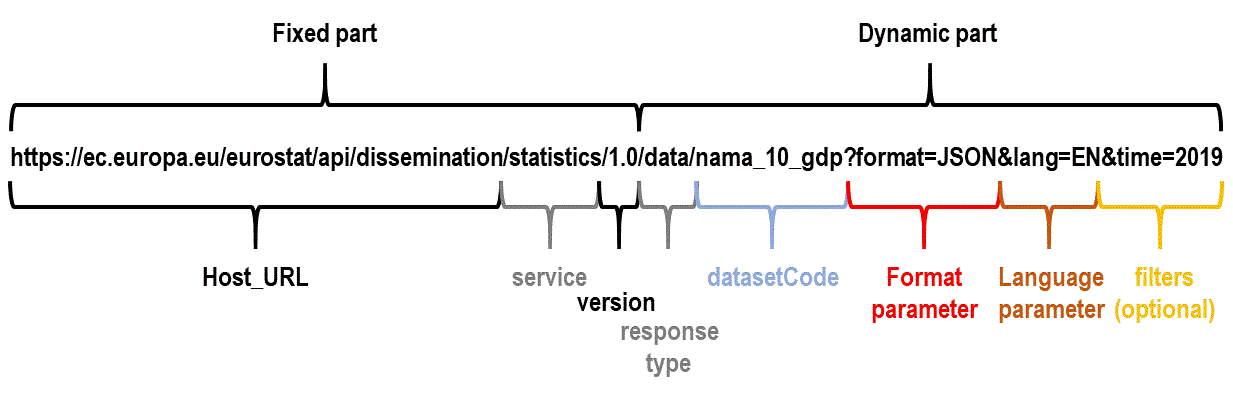




## ❌ Bad request

It can happens that something was wrong or missing in the information you sent. Maybe you left out a required field, typed something in the wrong format, or asked for something the system doesn't understand. The system can't process the request until the problem is fixed.

Usually, when there's a problem, the system returns a numeric code to help explain the type of error:
* If an error code starts with a `4xx`, it usually means there’s something wrong with the request we sent (like a typo or missing information), and we can often fix it ourself.
* If it starts with a `5xx`, it means there’s a problem on the server, and we usually need to wait for the service provider to fix it.

Eurostat is very user-friendly, because it doesn't just give us the error code — it also includes a short explanation to help us understand what went wrong and how to fix it.

### 👉 It's you turn
Try opening the following API requests in your browser to see what kind of error appears:
* [API request 1](https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/tps00001?format=JON&time=2024&geo=EU27_2020&indic_de=JAN&lang=en)
* [API request 2](https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/tps0001?format=JSON&time=2024&geo=EU27_2020&indic_de=JAN&lang=en)
* [API request 3](https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/tps00001?format=JSON&time=2024&geo=EU27_2020&indic_de=JAN&&lang=en)
* [API request 4](https://ec.europa.eu/eurostat/api/dissemination/statistic/1.0/data/tps00001?format=JSON&time=2024&geo=EU27_2024&indic_de=JAN&lang=en)
* [API request 5](https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/tps00001?format=JSON&time=2024&geo=EU27_1990&indic_de=JAN&lang=en)

## 💬 Composing a query from scratch

We are looking for data on the value of exports in euros from the European Union to the rest of the world, broken down by:
* Product group (e.g. chemicals, machinery);
* Year (from 2018 to the latest available year);

The dataset responding to our needs is the “[Intra and Extra-EU trade by Member State and by product group](https://ec.europa.eu/eurostat/databrowser/view/ext_lt_intratrd/default/table?lang=en)”

### ⛑️ The query builder tool

Eurostat provides a useful tool to help us build our queries:
https://ec.europa.eu/eurostat/web/query-builder/tool

So, let’s try it out. What result do we get? What happens if we paste this link into the browser?

In [ ]:
#@title 🆘solution {display-mode: "form"}
"""
The result is:
https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/ext_lt_intratrd?format=JSON&sinceTimePeriod=2018&geo=EU27_2020&indic_et=MIO_EXP_VAL&sitc06=TOTAL&sitc06=SITC0_1&sitc06=SITC2_4&sitc06=SITC3&sitc06=SITC5&sitc06=SITC6_8&sitc06=SITC7&sitc06=SITC9&partner=EXT_EU27_2020&lang=en

The browser returns a structured file (JSON), which is the raw data response from the API — ready to be used in your code or analysis.
"""

### 🐍 The Python code

Here’s some Python code to fetch and explore data from the Eurostat API.

What we’re doing is simple:

* First, we break the link (URL) we found into two parts:
the base URL and the parameters we want to include in our request.

* Then, we use the `requests` library to send the request and ask for the data.

* Finally, the `json` library helps us read and display the content of the response in a readable format.

In [ ]:
import requests
import json

# Define the API URL
url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/ext_lt_intratrd"
params = {
    "format": "JSON",
    "sinceTimePeriod": "2018",
    "geo": "EU27_2020",
    "indic_et": "MIO_EXP_VAL",
    "sitc06": [
        "TOTAL",
        "SITC0_1",
        "SITC2_4",
        "SITC3",
        "SITC5",
        "SITC6_8",
        "SITC7",
        "SITC9"
    ],
    "partner": "EXT_EU27_2020",
    "lang": "en"
}

# Make the request
response = requests.get(url, params=params)
response

<Response [200]>

In [ ]:
data = response.json()
data

{'version': '2.0',
 'class': 'dataset',
 'label': 'Intra and Extra-EU trade by Member State and by product group',
 'source': 'ESTAT',
 'updated': '2025-05-16T11:00:00+0200',
 'value': {'7': 150829.3,
  '8': 163144.0,
  '9': 166557.2,
  '10': 175688.2,
  '11': 203872.0,
  '12': 204330.2,
  '13': 209353.7,
  '14': 53210.8,
  '15': 54646.7,
  '16': 53593.4,
  '17': 71243.4,
  '18': 76215.0,
  '19': 67636.4,
  '20': 68352.0,
  '21': 113063.8,
  '22': 103466.5,
  '23': 64077.8,
  '24': 104512.8,
  '25': 181161.5,
  '26': 142413.3,
  '27': 130376.6,
  '28': 375934.1,
  '29': 408813.5,
  '30': 412599.3,
  '31': 457731.0,
  '32': 551742.1,
  '33': 523168.6,
  '34': 560191.4,
  '35': 475862.8,
  '36': 488609.1,
  '37': 435058.3,
  '38': 499430.5,
  '39': 570406.4,
  '40': 552862.3,
  '41': 557997.4,
  '42': 858136.4,
  '43': 876488.3,
  '44': 763894.7,
  '45': 837669.7,
  '46': 951297.2,
  '47': 1027385.3,
  '48': 1011888.9,
  '49': 31432.5,
  '50': 36880.0,
  '51': 36295.9,
  '52': 34388.2,
 

eurostat_api_response_structure.svg

Let’s break down the structure of the Eurostat API response and see what each part means so we can confidently work with it in the future.

## 🧩 The structure of the Eurostat API response
The response is a multi-dimensional dataset. It’s designed to be efficient, not immediately human-readable. It is organized in three main parts:

#### **1. value: the actual data**
A dictionary containing the numerical values:

```
"value": {
  '7': 150829.3,
  ...
  "0": 2058469.7,
  "1": 2132048.1,
  ...
}
```

Each key ("0", "1", "2", etc.) is an index and refers to a unique combination of categories (like product group, year, geographic area).

#### **2. id, size, dimension: the structure of the dataset**

**`id`: the order of dimensions**   
This tells you the order in which dimensions are combined for each data point.
```
"id": ["freq", "indic_et", "sitc06", "partner", "geo", "time"]
```

**`size`: how many values each dimension has**
```
"size": [1, 1, 8, 1, 1, 7]
```
This means:
1 frequency (yearly)
1 indicator (exports)
8 product groups
1 partner (Extra-EU)
1 reporting country (EU27)
7 years (2018 to 2024)

So:
1 × 1 × 8 × 1 × 1 × 7 = 56 total data points, which match the 56 entries in value.


**`dimension`: what each category means**
Each dimension includes:
* `index`: mapping from values (e.g. "TOTAL") to internal index positions (e.g. 0)
* `label`: human-readable name

🟢 To build a complete data point, we combine information from multiple dimensions using their index positions.

**For the value with index 0:**  
Value: 2058469.7  
This represents:
* Product: "Total - all products" (position 0 in sitc06 dimension)
* Time: 2018 (position 0 in time dimension)
* Trade type: "Exports in million of ECU/EURO"
* Partner: "Extra-EU27 (from 2020)"
* Reporter: "European Union - 27 countries (from 2020)"


**For the value with index 1:**  
Value: 2132048.1  
This represents:
* Product: "Total - all products" (position 0 in sitc06 dimension)
* Time: 2019 (position 1 in time dimension)
* Same trade type, partner, and reporter as above


**For the value with index 7:**   
Value: 150829.3  
To find which combination index 7 represents, we need to consider that time has 7 categories and sitc06 has 8 categories, so the indices increment like this:

* `Index 0-6: All time periods (2018-2024) for SITC "TOTAL"`
* `Index 7: First time period (2018) for SITC "SITC0_1"`

This represents:
* Product: "Food, drinks and tobacco" (SITC0_1 - position 1 in sitc06)
* Time: 2018 (position 0 in time)
* Same trade type, partner, and reporter as above

## 📋 Extract and present the data in tabular form

We’d like to visualize the data with years as rows and product groups as columns, a format that’s much easier to read and analyze.

But turning the raw JSON response into a human-readable table can be quite tricky and time-consuming to code by hand.

That’s the perfect moment to ask for help from our favorite AI assistant!
Bots are really good at this kind of task, as long as you show them an example of the response and clearly explain how you want the final table to look.

This is an example of prompt you can submit to your bot:

> *I have a JSON response from the Eurostat API containing international trade data, broken down by product group and year.*  
*I want to convert this JSON into a table (or a pandas DataFrame) where:*
 - *each row is a year*
 - *each column is a product group*  
 - *each cell contains the corresponding trade values*

>  *Here's a sample of the JSON response:*  
[`paste a small portion of the JSON here`]  
*Can you help me write simple and clear Python code to transform this JSON into the desired format?*

In [ ]:
import pandas as pd

# Extract years and product categories for our DataFrame
years = list(data['dimension']['time']['category']['label'].values())
product_categories = list(data['dimension']['sitc06']['category']['label'].values())

# Create a dictionary to map position to [year, product_category]
position_map = {}

# Based on the structure of the data, positions are calculated as:
# Position = sitc06_index * 7 + time_index
# Where 7 is the number of years (size of the time dimension)

sitc06_indices = data['dimension']['sitc06']['category']['index']
time_indices = data['dimension']['time']['category']['index']

for sitc_code, sitc_index in sitc06_indices.items():
    for year, time_index in time_indices.items():
        position = sitc_index * 7 + time_index
        position_map[str(position)] = (year, sitc_code)

# Create DataFrame structure
df_data = {product: [] for product in product_categories}
df_index = years

# Populate data
for position, value in data['value'].items():
    if position in position_map:
        year, product_code = position_map[position]
        product_name = data['dimension']['sitc06']['category']['label'][product_code]
        year_index = years.index(year)

        # Ensure the lists are of appropriate length
        for product in product_categories:
            while len(df_data[product]) <= year_index:
                df_data[product].append(None)

        df_data[product_name][year_index] = value

# Create the DataFrame
df = pd.DataFrame(df_data, index=df_index)

# Sort columns alphabetically
df = df.reindex(sorted(df.columns), axis=1)

df

,"Chemicals and related products, n.e.s.",Commodities and transactions not classified elsewhere in the SITC,"Food, drinks and tobacco",Machinery and transport equipment,"Mineral fuels, lubricants and related materials",Other manufactured goods,Raw materials,Total - all products
2018,375934.1,31432.5,150829.3,858136.4,113063.8,475862.8,53210.8,2058469.7
2019,408813.5,36880.0,163144.0,876488.3,103466.5,488609.1,54646.7,2132048.1
2020,412599.3,36295.9,166557.2,763894.7,64077.8,435058.3,53593.4,1932076.5
2021,457731.0,34388.2,175688.2,837669.7,104512.8,499430.5,71243.4,2180663.8
2022,551742.1,35526.2,203872.0,951297.2,181161.5,570406.4,76215.0,2570220.4
2023,523168.6,39225.8,204330.2,1027385.3,142413.3,552862.3,67636.4,2557022.0
2024,560191.4,45395.6,209353.7,1011888.9,130376.6,557997.4,68352.0,2583555.5


### 👉 It's you turn

Now let’s replicate the procedure we’ve just learned using a new dataset:  
“[International trade of EU and non-EU countries since 2002 by SITC](https://ec.europa.eu/eurostat/databrowser/view/ds-059331/legacyMultiFreq/table?lang=en)”

🎯 Goal: Retrieve the yearly export values (in euros) from France and Germany to the United States, starting from the year 2021.


Here’s a quick summary of the steps you need to follow:

1. Identify the key dimensions and categories you’re interested in (for example, flow type, partner country, product code, time period).

2. Build your API query using the dataset code and the selected parameters. You can use the Eurostat Query Builder to help you.

3. Analyze the API response – check the structure of the data.

4. Transform the data into a human-readable format (like a table), using Python and libraries such as pandas.

In [ ]:
#@title 🆘solution {display-mode: "form"}

"""
The complete API url is
https://ec.europa.eu/eurostat/api/comext/dissemination/statistics/1.0/data/ds-059331?format=JSON&sinceTimePeriod=2021&reporter=DE&reporter=FR&partner=US&product=TOTAL&flow=2&indicators=VALUE_EUR&freq=A&lang=en
"""

import requests
import json
import pandas as pd

# Define the API URL
url = "https://ec.europa.eu/eurostat/api/comext/dissemination/statistics/1.0/data/ds-059331"

params = {
    "format": "JSON",
    "sinceTimePeriod": "2021",
    "reporter": ["DE", "FR"],
    "partner": "US",
    "product": "TOTAL",
    "freq": "A",
    "flow": "2",
    "indicators": "VALUE_EUR",
    "lang": "en"
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Extract years and reporting countries for our DataFrame
years = list(data['dimension']['time']['category']['label'].values())
countries = list(data['dimension']['reporter']['category']['label'].values())

# The value field is using numeric keys that correspond to the original dataset's indices
# We need to interpret what these numeric keys mean based on the API response

# Extract the actual values and their meaning from the SITC codes
sitc_values = data['value']

# Looking at the API structure, let's properly extract the time and reporter dimensions
reporter_labels = data['dimension']['reporter']['category']['label']
time_labels = data['dimension']['time']['category']['label']

# Create the result DataFrame directly
rows = []

# According to the API structure, there should be 2 reporters (Germany, France) and 5 years (2021-2025)
# However, the values are stored with numeric keys ('0', '1', '2', etc.)

# We need to examine the actual dimensions to understand the structure
# Based on the 'id', 'size', and the data structure, we can see:
# - The order of dimensions is [freq, reporter, partner, product, flow, indicators, time]
# - Size is [1, 2, 1, 1, 1, 1, 5] meaning there are 2 reporters and 5 time periods

# Since 'id' tells us the order is [freq, reporter, partner, product, flow, indicators, time]
# And there are 2 reporters and 5 time periods, we can interpret the numeric keys as follows:
# The first 5 values (0-4) are for the first reporter (Germany) for 5 years
# The next 5 values (5-9) are for the second reporter (France) for 5 years

# Extract reporter codes
reporter_codes = list(data['dimension']['reporter']['category']['index'].keys())
# Germany and France
reporter_map = {0: reporter_codes[0], 1: reporter_codes[1]}  # 0 -> DE, 1 -> FR

# Extract time codes
time_codes = list(data['dimension']['time']['category']['index'].keys())
# 2021, 2022, 2023, 2024, 2025
time_map = {i: time_codes[i] for i in range(len(time_codes))}  # 0 -> 2021, 1 -> 2022, etc.

# Now we can properly map the numeric keys to reporter and time
result_data = []

# The numeric keys in data['value'] follow the pattern: reporter_index * time_size + time_index
for position_str, value in sitc_values.items():
    position = int(position_str)

    # Calculate which reporter and which time period this value belongs to
    time_size = data['size'][6]  # Size of time dimension (5)
    reporter_index = position // time_size
    time_index = position % time_size

    # Check if these indices are valid
    if reporter_index < len(reporter_codes) and time_index < len(time_codes):
        reporter_code = reporter_map.get(reporter_index)
        year = time_map.get(time_index)

        if reporter_code and year:
            reporter_name = reporter_labels[reporter_code]

            result_data.append({
                'Year': year,
                'Country': reporter_name,
                'Country Code': reporter_code,
                'Export Value (EUR)': value
            })

# Create the DataFrame
df = pd.DataFrame(result_data)

# Create a pivot table with years as rows and countries as columns
pivot_df = df.pivot(
    index='Year',
    columns='Country Code',
    values='Export Value (EUR)').astype(int)

# Sort columns alphabetically
pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)
pivot_df

Country Code,DE,FR
Year,,
2021,122588392753,35095372845
2022,155900289429,46619106515
2023,157731874052,43883988999
2024,161199552963,47089146875


## 📚 The Eurostat API user guides

If you want to explore further, you can read the Eurostat user guides available at the following URL:  
* [API user guides](https://ec.europa.eu/eurostat/web/user-guides/data-browser/api-data-access)
* [API statistics guidelines](https://ec.europa.eu/eurostat/web/user-guides/data-browser/api-data-access/api-detailed-guidelines/api-statistics)